In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as np

In [ ]:
# Solving Classification Problems in ML

# Classification problems are the type of problems where you have to predict a dicrete value, i.e. whether the condition of car
# is good or not. Whether or not a student will pass an exam.

# Preparing Data for classification problems

# Like regression, you have to convert data into a specific format before it can be used to train classification algorithms

In [ ]:
# Churn Modelling

churn_df = pd.read_csv("Churn_Modelling.csv")
# This dataset contains records of customers who left the bank six months after various information about them is recorded.

churn_df.head()

In [ ]:
# The output shows that the dataset contains information such as surname, customer id, geography, gender etc. The
# Exited column contains information about whether or not the customer exited the bank after six months

# We do not need rownumer, customerid, surname

# removing unnecessary columns

churn_df= churn_df.drop(['RowNumber','CustomerId','Surname'], axis=1)



In [ ]:
# Dividing data into features and labels

# The features set i.e. X contains all the columns except te Exited column. On the other hand, the label set 'y' contains
# values from the Exited column only

# create feature set
X=churn_df.drop(['Exited'],axis=1)

#create label set
y=churn_df['Exited']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Converting categorical data to numbers
# For classification problems too we need to convert categorical columns to numerical ones

# dropping categorical columns
numerical=X.drop(['Geography','Gender'],axis=1)

numerical.head()

In [ ]:
# filtering categorical columns

categorical= X.filter(['Geography','Gender'])
categorical.head()

In [ ]:
# converting categorical to numeric

# converting categorical columns to one hot encoded columns

import pandas as pd
cat_numerical= pd.get_dummies(categorical, drop_first=True)
cat_numerical.head()

In [ ]:
# concating numerical columns with one-ot encoded columns

X= pd.concat([numerical,cat_numerical],axis=1)
X.head()

In [ ]:
# Dividing the dataset into Training and Test sets

# Like regression in classification problems we divide the dataset into two sets i.e. train set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20, random_state=0)

In [ ]:
#Datascaling/Normalization- The last step before the data is passed to the machine learning algorithm is to scale the data

# applying standard scaling to the dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [ ]:
# We have converted data into a format that can be used to train machine learning algorithms for classification

In [ ]:
# Binary classification problems- These are those classification problems where there re only two possible values for
# the output label/ E.g. whether a student will pass or fail. Whther a customer will churn or not

In [ ]:
# Logistic Regression- Logistic regression is a linear model, which makes classification by passing the output of
# linear regression through a sigmoid function.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf= LogisticRegression()

# training the logistc regression classifier
classifier= log_clf.fit(X_train, y_train)

#making predictions on the test set
y_pred= classifier.predict(X_test)

In [ ]:
# Once you have trained a model and have made predictions on the test set, the next step is to know how well your model
# has performed for making predictions on the unknown test set. There are various metrics to evaluate a classification model.
# These are F1 score, recall, precision, accuracy and confusion matrix.

In [ ]:
# True Negatives: (TN/tn): True negatives are those output labels that are actually false and the model also predicted
# as false
# True Positive: True Positives are those labels that are actually true and also predicted as true by the model
# False Negative: False negatives are labels that are actually true but predicted as false by ML models
# False Positive: Labels that are actually false but predicted as true by the model are called false positive

In [ ]:
# Precision- Another way to analyse a classification algorithm which is basically obtained by dividing true positives
# by the sum of true positives and false positive

# Recall- Recall is calculated by dividing true positives by the sum of true positive and false negative

# F1-measure- Harmonic mean of precision and recall

# Accuracy- It refers to the number of correctly predicted labels divided by the total number of observations in a dataset

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


The output shows that for 81 percent of the records in the test set, logistic regression correctly predicted whether or not a customer will leave the bank.

### Random forest classifier

 
 
 It is a tree based algo which converts features to tree nodes and uses entropy losses to make classification predictions


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42,n_estimators = 500)

# training the random forest classifier
classifier = rf_clf.fit(X_train,y_train)

# making predictions on the test set
y_pred = classifier.predict(X_test)

#evaluating the algo on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
#Clustering- Clustering algorithms are unsupervised algorithms where the training data is not labeled.
# The algorithm cluster or group the data sets based on the common characteristics.
# K-Means clustering
# Hierarchical clustering

#K-means clustering- is the most commonly used algorithm for clustering unlabeled data. In K-Means clustering, K refers to the
# number of clusters that you want your data to be grouped into.

# Steps for K-means clustering

# Randomly assign centroid values for each cluster
# Calculate the distance (Euclidean or Manhattan) between each data point and centroid values of all clusters
# Assign the data point to the cluster of the centroid with the shortest distance
# Calculate and update the centroid values based on the mean values of the coordinates of all the data points
# of the corresponding cluster.
# Repeat steps 2-4 util new centroid values for all the clusters are different from the previous centroid values

In [ ]:
# Why K-Means clustering

# K-Means is simple to implement algorithm
# It can be applied to large datasets
# It scales well to unseen data points
# It generalises well to clusters of various sizes and shapes

In [ ]:
# Customer Segmentation using K-Means clustering

# In this example you will see how to segment customers based on their incomes and past spending habits. You will then 
# identify customers who have high incomes and higher spending

import  numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

In [ ]:
# In the above data the spending score is the score assigned to customers based on their previous spending habits.
# Customers with higher spending in the past have higher scores

In [ ]:
dataset.shape

In [ ]:
sns.distplot(dataset['Annual Income (k$)'],kde = True,bins=50)

In [ ]:
# We can also plot a regression line between annual income and spending score to see if there is any linear relationship
# between the two or not

# plotting regression plot for annual income against spending score
sns.regplot(x='Annual Income (k$)',y="Spending Score (1-100)",data = dataset)

In [ ]:
# From above chart there is no linear relationship between annual income and spending

In [ ]:
sns.regplot(x='Age',y="Spending Score (1-100)",data = dataset)

The above chart confirms an inverse linear relationship between age and spending score. It can be inferred from the output that young people have higher spending compared to older people.

In [ ]:
dataset = dataset.filter(['Annual Income (k$)','Spending Score (1-100)'],axis=1)
dataset.head()

In [ ]:
# performing kmeans clustering
km_model = KMeans(n_clusters=4)
km_model.fit(dataset)

In [ ]:

# Once the model is trained, you can print the cluster centers 
print(km_model.cluster_centers_)

In [ ]:
# In addition to finding cluster centers, the K_Means class also assigns a cluster label to each data point. The cluster labels
# are numbers that basically serve as cluster id 0,1,2,3
print(km_model.labels_)

In [ ]:
plt.scatter(dataset.values[:,0],dataset.values[:,1],c = km_model.labels_,cmap='rainbow')
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

Till now we have been randomly initialising the value of k or the number of cluster. However, we do not know how many segments of customers are there in out dataset. To find the optimal number of customer segments, we need to find the optimal number of K. This can be done using a method know as elbow method

In [ ]:
loss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(dataset)
    loss.append(km.inertia_)
    
# printing loss against number of clusters
plt.plot(range(1,11),loss)
plt.title("Findind optimal clusters using Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Loss")
plt.show()

In [ ]:
# From the above output, it can be seen that the value of inertia didn't decrease much after five clusters

# Lets segment our customer data into five groups by creating five clusters
km_model = KMeans(n_clusters=5)
km_model.fit(dataset)

In [ ]:
plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s=100, c='black')

From the above output, you can see that the customers are divided into five segements. The customers in the middle of the plot are the customers with average income and average spending. The customers beloging to the red cluster are the ones with low income and low spending. 


We need to target the customers belogning to the top right cluster. These are the customers with high incomes and higher spending and they are more likely to spend in the future. 

So, any new marketing campaigns or
advertisements should be directed to these cusomers

In [ ]:
# First we will lot the centers of the clusters

print(km_model.cluster_centers_)

In [ ]:
# To fetch all the record of customer with id 1
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = km_model.labels_

In [ ]:

cluster_map = cluster_map[cluster_map.cluster==1]
cluster_map.head(20)

In [ ]:
# We can simply filter all the records from the cluster_map dataframe, where the vlaue of the cluster column is 1

cluster_map = cluster_map[cluster_map.cluster==1]
cluster_map.head()

In [ ]:
cluster_map.info()

In [ ]:
# Dimensionality Reduction with PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis)
# SVD (Singular Value Decomposition)

# Dimensionality reduction refers to reducing the number of features in a dataset in such a way that the overall
# performance of the algorithms trained on the dataset is minimally affected.With dimensionality reduction, the training
# time of the statistical algorithm can be significantly reduced and data can be visualised more easily since it is not easy to 
# visualise datasets in higher dimensions

### PCA (Principal Component Analysis)

In [ ]:
# It is an unsupervised dimensionality reduction technique that doesn't depends on the labels of the dataset. 
# PCA prioritizes features on the basis of their ability to cause maximum variance in the outut.
# The idea behind PCA is to capture those features that conatin maximum information about the datsset.

# Why use PCA?

# Using PCA correlated features can be detected and removed
# It reduces overfitting because of a reduction in the number of features
# Model training can be expedited

#Disadvantages of PCA

# You need to standardize the data before you apply PCA
# Independent variables becomed less integrable
# Some amount of information is lost when you reduce features

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
iris_df= sns.load_dataset("iris")
iris_df.head()

In [ ]:
# creating feature sets
X = iris_df.drop(['species'],axis=1)

# creating labels set
y = iris_df['species']

# converting label to number
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [ ]:
#  Before we apply PCA on a dataset, we will divide it into training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# applying scaling on training and test data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# importing PCA class
from sklearn.decomposition import PCA

# creating object of PCA class
pca = PCA()
# training the PCA model on training data
X_train = pca.fit_transform(X_train)

# make predictions on the test data
X_test = pca.fit_transform(X_test)

In [ ]:
# printing variance ratio
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

In [ ]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1], c = y_test, cmap = 'rainbow')

Performance of the ml model depends upon several factors such as training and test sets used to train and test an algorithm, values of the hyperparameters of an algorithm and metrics used to evaluate the performance  of an algorithm


1) K-fold cross validation

It is a data splitting technique that lets you train and test the model on all subsets of data 

Till now we used 80:20 split.ie,. 80% is train and 20% is test. For more stable results it is recommended that all the parts of the dataset are atleast used once for training and once for testing. To do so , K-fold cross validation can be used.

With K-fold cross validation the data is divided into K parts. The experiments are also performed for k parts.In each experiment K-1 parts are used for training and the kth part is used for testing 

for example in 5-fold cross validation, the data is divided in to 5 equal parts. In the first iteration, K1-K4 are used for training  while K5 is used for testing. In the second test, K1, K2, K3 , K5 are used for training while K4 is used for testing.

This way each part is used atleast once for testing and once for training 

In [ ]:
# Prediction without cross validation
import pandas as pd
import numpy as np

In [ ]:
wine_data = pd.read_csv("winequality-red (1).csv")
wine_data.head()

In [ ]:
X = wine_data.drop(['quality'],axis = 1)
y = wine_data['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42,n_estimators = 500)
regressor = rf_reg.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
# prediction using cross_validation - this time data will be trained by using 5-fold validation

X = wine_data.drop(['quality'],axis = 1)
y = wine_data['quality']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Next, instead of dividing the dataset into the training and test sets, you will initialize the instance of your ML model

rf_reg = RandomForestRegressor(random_state = 42, n_estimators = 500)

In [ ]:
from sklearn.model_selection import cross_val_score

#applying cross validation with 5 folds

score = cross_val_score(rf_reg,X,y,cv=5,scoring = 'neg_mean_absolute_error')
print(score)

Hyperparameter selection - there exists algorithms that can be used to select the best paramters from a list of parameters.

One such algorithm is Grid Search algorithm

To perform grid search, you have to create a dictionary where dictionary keys represent the parameter name and dictionary values consist of lists, which contains items that contain values that you want to test for the attributes specified as dictionary keys.


In [ ]:
# defining the list of hyperparameters to be tested

grid_param = {
    'n_estimators':[100,200,300,400,500],
    'min_samples_leaf':[1,3,5],
    'bootstrap':[True,False],
    'criterion':['mae']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=rf_reg,
                     param_grid=grid_param,
                     scoring = "neg_mean_absolute_error",
                     cv=5,
                     n_jobs = -1)


In [ ]:
# training with grid search
gd_sr.fit(X,y)

In [ ]:
# Once the grid search finishes training, you can find the best parameters that your grid seach algo selected

best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
# to see the best case mean absolute error

best_results = gd_sr.best_score_
print(best_results)

## Spam Email Detection

Spam email filtering in NLP task where based on the text of the email, we have to classify whether or not an email is a spam email. In this we use supervised ML algorithm

The naive bayes algo is on of the supervised ML algorithms that have been proven effective for spam email detection

Advanatages
- It performs well there is no relationship between attributes in a feature vector
- It requires a very small amount of data training
- It is very easy to imlement and understand

Disadvantages
- It is unable to capture the relatioship btw various features in the dataset
- If a category exists in the test set but not in the training set. the probability of prediciton for that category in the test set will be set to 0



In [3]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

In [4]:
message_dataset = pd.read_csv("emails.csv")
message_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


    In the above dataset, the text column contains text of emails and the spam column contains the label 1 or 0, where 1 corresponds to spam emails and 0 corresponds to non-spam emails or ham e-mails

In [5]:
message_dataset.shape

(5728, 2)

<AxesSubplot:ylabel='spam'>

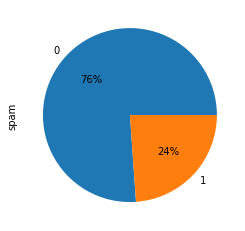

In [6]:
# Data visualization 
# Plot the pie chart

message_dataset.spam.value_counts().plot(kind = 'pie',autopct='%1.0f%%')

In [7]:
# from the above pie chart you can see that 24 percent of th emails are spam emails

In [8]:
# first we ll remove stopwords as a,is,you,I, are,etc because these words these occur a lot and they do not have any significant
# classification ability

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [10]:
# removing stop words from messages
message_dataset['text_without_sw'] = message_dataset['text'].apply(lambda x :" ".join([item for item in x.split()
                                                                                      if item not in stop]))

In [11]:
# Before we actually train our ML algorithm we need to remove special characters and numbers from our text. Removing special
# characters and numbers creates empty spaces in the text, which also needs to be removed.

In [12]:
# creating feature set
X = message_dataset['text']

# creating Label set
y = message_dataset['spam']

We will create a function clean_text() which accepts text string and returns a string that is cleaned of digits, special characters and multiple empty spaces


In [13]:
# cleaning feature set (email messages)
def clean_text(doc):
    # removing everything except capital and small letters
    document = re.sub('[^a-zA-Z]',' ',doc)
    
    # removing the single characters
    document = re.sub(r"\s+[a-zA-Z]\s+",' ',document)
    
    # removing the multiple empty spaces
    document = re.sub(r'\s+',' ',document)
    
    return document

In [14]:
X_sentences =  []
reviews = list(X)

# cleaning all sentences using clean_text() function

for rev in reviews:
    X_sentences.append(clean_text(rev))

convert text into numbers

Naive bayes algo is a statistical algo which works with numbers. Therefore we need to convert the text of e-mails into numeric form.

There are various ways:
- Bag of words
- TFIDF
- Word Embedding

In this project we ll use TFIDF technique  for converting text to numbers

In [15]:
# importing stopwords and TFIDF vectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# converting e-mail messages to text via TFIDF vecoriser

vectorizer = TfidfVectorizer(max_features=2500,min_df=5,max_df=0.7,
                            stop_words=stopwords.words('english'))

X = vectorizer.fit_transform(X_sentences).toarray()

x In the above code max_feature attribute specifies that a maximum pf 2500 most occuring keywords should be used to create a feature dictionary.
 
 The min_df attribute here specifies to only include words that occur in atleast 5 documents
 
 The max_df attribute defines not to include words that occur in more than 70 percent of the documents

In [19]:
# Training the model 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  =  train_test_split(X,y,test_size=0.20,random_state = 42)

In [21]:
# training the Naive Bayes algo on the training data
spam_detector = MultinomialNB()
spam_detector.fit(X_train,y_train)

MultinomialNB()

In [23]:
# Evaluating the model performance

y_pred = spam_detector.predict(X_test)

In [24]:
# Evaluating  model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[849   7]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9781849912739965


In [ ]:
# shows that the model is 97.81 % accurate while predicting whether the msg is spam or not

In [27]:
# making predictions on single instance

# printing senctence at index 56 in the dataset

print(X_sentences[56])

# print label for the sentence at index 56

print(y[56])

Subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1


In [28]:
# making prediction for the label for the sentence at index 56

print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]


The model correctly classified the message as spam 

## Image Classification

In [31]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [32]:
print(mnist.data.shape)

(70000, 784)


In [33]:
import numpy as np
np.unique(mnist.target)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [35]:
# printing the first image
image_0 = mnist.data[0].reshape(28,28)
import matplotlib as plt
plt.gray()
plt.matshow(image_0)
plt.show()

KeyError: 1